In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
sales = pd.read_csv("D:\ExcelR\Assigments\Random_Forests\Company_Data.csv")
sales

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
sales.shape

(400, 11)

In [4]:
sales.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [5]:
sales.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
sales['ShelveLoc']=le.fit_transform(sales['ShelveLoc'])
sales['Urban']=le.fit_transform(sales['Urban'])
sales['US']=le.fit_transform(sales['US'])

In [8]:
sales.insert(11,'sales_category','')

In [9]:
sales.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_category
0,9.50,138,73,11,276,120,0,42,17,1,1,
1,11.22,111,48,16,260,83,1,65,10,1,1,
2,10.06,113,35,10,269,80,2,59,12,1,1,
3,7.40,117,100,4,466,97,2,55,14,1,1,
4,4.15,141,64,3,340,128,0,38,13,1,0,


In [10]:
for i in range(0,len(sales['Sales']),1):
    if sales['Sales'][i]>=11.0:
        sales["sales_category"][i]='high'
    elif sales['Sales'][i]<=6.0:
        sales['sales_category'][i]='Low'
    else:
        sales['sales_category'][i]='Medium'

In [11]:
sales.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_category
0,9.50,138,73,11,276,120,0,42,17,1,1,Medium
1,11.22,111,48,16,260,83,1,65,10,1,1,high
2,10.06,113,35,10,269,80,2,59,12,1,1,Medium
3,7.40,117,100,4,466,97,2,55,14,1,1,Medium
4,4.15,141,64,3,340,128,0,38,13,1,0,Low


In [12]:
x=sales.iloc[:,1:11]
y=sales['sales_category']

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf_model =RandomForestClassifier()

In [15]:
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [16]:
y_pred = rf_model.predict(x_test)

In [17]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         Low       0.82      0.54      0.65        26
      Medium       0.71      0.94      0.81        47
        high       1.00      0.14      0.25         7

    accuracy                           0.74        80
   macro avg       0.84      0.54      0.57        80
weighted avg       0.77      0.74      0.71        80



In [19]:
print(confusion_matrix(y_test,y_pred))

[[14 12  0]
 [ 3 44  0]
 [ 0  6  1]]


In [20]:
print(accuracy_score(y_test,y_pred))

0.7375


In [21]:
from sklearn.model_selection import GridSearchCV
grid_model=GridSearchCV(estimator = rf_model,param_grid={'criterion':['entropy','gini'],
                                                       'max_depth':[2,4,8,10],
                                                        'min_samples_split':[2,4,6,8],
                                                        'min_samples_leaf':[1,2,3,4],
                                                        'n_estimators':[20,30,20,100,150]})
grid_model.fit(x_train,y_train)
print(grid_model.best_params_)
print(grid_model.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 20}
0.690625


In [22]:
rf_model_cv=RandomForestClassifier(max_depth=8,min_samples_leaf=1,min_samples_split= 8,criterion='entropy',n_estimators=100)
rf_model_cv.fit(x_train,y_train)
y_pred_cv=rf_model_cv.predict(x_test)
print(accuracy_score(y_test,y_pred_cv))

0.7625


## Feature importance plot

In [23]:
feature_rf = x_train.columns
len(feature_rf)

10

In [24]:
imp_feature_rf = rf_model.feature_importances_
len(imp_feature_rf)

10

In [25]:
rf_data = pd.DataFrame({'feature':feature_rf,'imp_feature':imp_feature_rf})
rf_data = rf_data.sort_values('imp_feature')

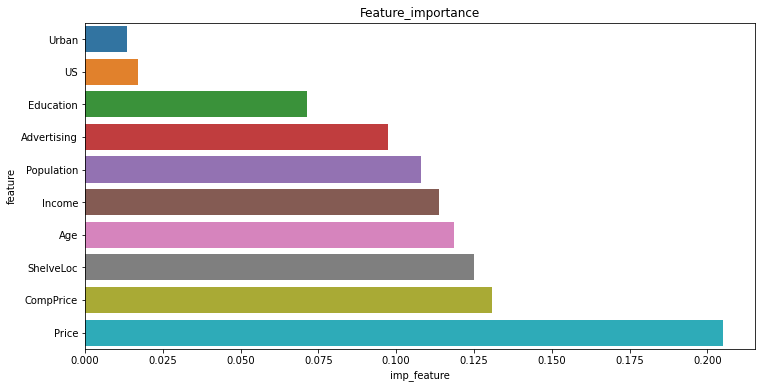

In [26]:
plt.figure(figsize=(12,6))
plt.title('Feature_importance')
sns.barplot(x='imp_feature',y='feature',data=rf_data)
plt.show()

## Feature selection

In [27]:
from sklearn.feature_selection import SelectFromModel

In [28]:
slctr = SelectFromModel(estimator=RandomForestClassifier())
slctr.fit(x_train,y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [29]:
slctr.get_support()

array([ True,  True, False,  True,  True,  True,  True, False, False,
       False])

In [30]:
len(x_train.columns)

10

In [31]:
feature = x_train.columns[slctr.get_support()]

In [32]:
len(feature)

6

In [33]:
x_train_rf = slctr.transform(x_train)
x_test_rf = slctr.transform(x_test)
rf_model_imp=RandomForestClassifier().fit(x_train_rf,y_train)
y_pred_imp=rf_model_imp.predict(x_test_rf)

In [34]:
print('accuracy_score:',accuracy_score(y_test,y_pred_imp))
print('----------------------------------')
print('classification_report:',classification_report(y_test,y_pred_imp))
print('----------------------------------')
print('confusion_matrix:',confusion_matrix(y_test,y_pred_imp))

accuracy_score: 0.75
----------------------------------
classification_report:               precision    recall  f1-score   support

         Low       0.89      0.62      0.73        26
      Medium       0.74      0.89      0.81        47
        high       0.40      0.29      0.33         7

    accuracy                           0.75        80
   macro avg       0.68      0.60      0.62        80
weighted avg       0.76      0.75      0.74        80

----------------------------------
confusion_matrix: [[16 10  0]
 [ 2 42  3]
 [ 0  5  2]]


In [35]:
imp_feature = rf_model_imp.feature_importances_
imp_feature

array([0.16828153, 0.16063311, 0.13772285, 0.23631708, 0.14428974,
       0.15275568])

In [36]:
data_imp=pd.DataFrame({'feature':feature,'imp_feature':imp_feature})
data_imp=data_imp.sort_values('imp_feature')

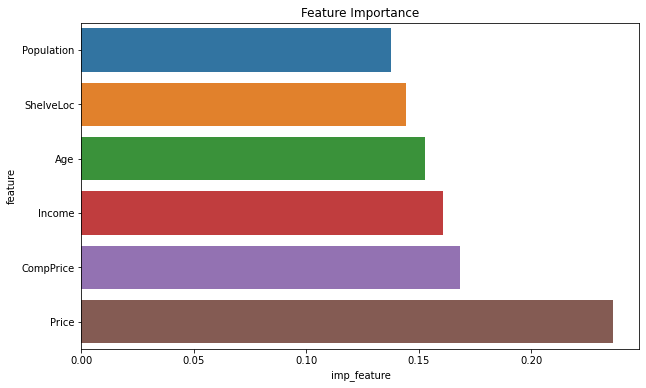

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='feature', x='imp_feature', data=data_imp)
plt.show()

## Recursive feature elimination

In [38]:
from sklearn.feature_selection import RFE

In [40]:
selector_rfe=RFE(RandomForestClassifier())
selector_rfe.fit(x_train,y_train)

RFE(estimator=RandomForestClassifier())

In [41]:
selector_rfe.get_support()

array([ True,  True, False, False,  True,  True,  True, False, False,
       False])

In [42]:
feature_rfe=x_train.columns[selector_rfe.get_support()]
feature_rfe

Index(['CompPrice', 'Income', 'Price', 'ShelveLoc', 'Age'], dtype='object')

In [43]:
len(x_train.columns[selector_rfe.get_support()])

5

In [44]:
x_train_rfe=selector_rfe.transform(x_train)
x_test_rfe=selector_rfe.transform(x_test)

In [45]:
rf_model_rfe=RandomForestClassifier().fit(x_train_rfe,y_train)
y_pred_rfe=rf_model_rfe.predict(x_test_rfe)

In [46]:
print(confusion_matrix(y_test,y_pred_rfe))

[[17  9  0]
 [ 4 37  6]
 [ 0  4  3]]


In [47]:
print(classification_report(y_test,y_pred_rfe))

              precision    recall  f1-score   support

         Low       0.81      0.65      0.72        26
      Medium       0.74      0.79      0.76        47
        high       0.33      0.43      0.38         7

    accuracy                           0.71        80
   macro avg       0.63      0.62      0.62        80
weighted avg       0.73      0.71      0.72        80



In [48]:
print(accuracy_score(y_test,y_pred_rfe))

0.7125


In [49]:
imp_feature_rfe=rf_model_rfe.feature_importances_

In [50]:
data_rfe=pd.DataFrame({'feature':feature_rfe,'imp_feature':imp_feature_rfe})
data_rfe=data_rfe.sort_values('imp_feature')

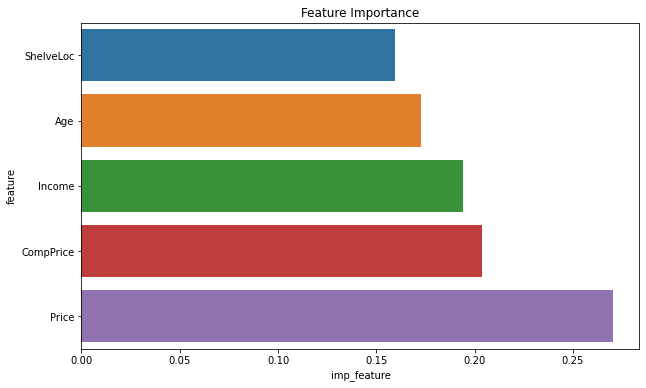

In [51]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='feature', x='imp_feature', data=data_rfe)
plt.show()